# Global analysis

Explanations on what we are doing here

## Importation of library and functions

In [1]:
import pandas as pd
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import math

In [2]:
from tqdm import tqdm
from time import time

In [3]:
import Filter

In [4]:
import ProjectPackage.DataExtraction as de
import ProjectPackage.Kinematic as km
from ProjectPackage import Cut

# First step : extraction and filtering of the data from measures

In [6]:
data_folder = 'D:/Data_muons/dimuonData_LHC18m'
# run_number = 291397
run_number = 291944

In [7]:
events = de.read_root_file(data_folder, run=run_number)

Size of the data file : 139.71 Mo.
Extraction took 56.1 s.
Number of events : 1638174.


## Applications of cuts and filters

### Cuts on events and tracks

In [9]:
N_cut_pDCA=5

In [10]:
df = Filter.all_filters_muons(events, N_cut=N_cut_pDCA)


Cut nMuons [...] 
 
This cut rejects 91.15 % of the statistics

Cut CMUL [...] 
 
This cut rejects 39.02 % of the statistics

Cut zVtx [...] 
 
This cut rejects 2.91 % of the statistics
Number of tracks : 181905.

Cut threshold [...] 
This cut rejects 27.41 % of the statistics

Cut eta [...] 
This cut rejects 12.58 % of the statistics

Cut pDCA [...] 
 
This cut rejects 1.36 % of the statistics
Max number of possible muons pairs : 58697

Total time needed : 35.71 s.


In [10]:
df

E        Px        Py         Pz  Charge  thetaAbs  \
entry  subentry                                                               
1      0          9.824776 -0.729350 -0.203351  -9.794986      -1  4.358090   
       1         21.081375 -0.628978  0.527052 -21.065132       1  2.251225   
2      1          8.141747  0.797963  0.291070  -8.096630      -1  6.225300   
       2          6.068054  0.368661  0.082491  -6.055361       1  3.529547   
3      0         20.110891 -0.931190 -0.081186 -20.088879      -1  2.666264   
...                    ...       ...       ...        ...     ...       ...   
611830 1         11.001936  0.207673  0.468197 -10.989499      -1  2.921972   
611831 0          6.011849  0.174243  0.210826  -6.004695       1  2.801206   
       1          7.970018  0.470683  0.370930  -7.946754      -1  4.522176   
611833 0         11.082841 -0.628493 -0.232921 -11.062050       1  3.296780   
       1         21.886776 -0.800251 -0.419314 -21.867867      -1  2.300253   

                      xDCA       yDCA      zDCA  matchedTrgThreshold  \
entry  subentry                                                        
1      0         -0.112560  -8.373335 -4.295027                    2   
       1         -1.458795  -6.554580 -4.295027                    2   
2      1        -11.111036  10.088162  2.018164                    2   
       2         -6.938339  13.598840  2.018164                    2   
3      0          2.355364   4.221308  1.725246                    2   
...                    ...        ...       ...                  ...   
611830 1        -12.434606 -17.856960  2.464451                    2   
611831 0         17.131769  -8.746505  2.782665                    2   
       1        -12.365128  11.916137  2.782665                    2   
611833 0         -7.721399  -1.516054 -4.144609                    2   
       1         -0.955772  -2.385545 -4.144609                    2   

                      eta          P        DCA        pDCA    s_pxDCA  
entry  subentry                                                         
1      0        -3.254679   7.424207   9.411305   69.871481  54.837788  
       1        -3.938856  18.081110   7.971064  144.125687  83.033965  
2      1        -2.950570   5.741062  15.142626   86.934753  54.641620  
       2        -3.468512   3.667134  15.399415   56.471719  54.404895  
3      0        -3.761360  17.110613   5.132607   87.822051  82.864205  
...                   ...        ...        ...         ...        ...  
611830 1        -3.759694   8.001428  21.898949  175.222872  81.308405  
611831 0        -3.782620   3.010921  19.435588   58.519018  80.485777  
       1        -3.279363   5.569318  17.396377   96.885954  54.621807  
611833 0        -3.497665   8.682337   8.893605   77.217277  54.986764  
       1        -3.880124  18.886521   4.876690   92.103714  83.175421  

[812520 rows x 15 columns]

In [11]:
df.to_csv(f'{run_number}_muons.csv')

NameError: name 'df' is not defined

In [11]:
df_dm = de.di_muons_dataframe(df)

100%|██████████| 56345/56345 [00:59<00:00, 947.21it/s] 


Execution time : 69.57


In [13]:
df_dm.to_csv(f'{run_number}_dimuons.csv')

In [13]:
all_hist = Filter.hist_M_inv_PT(df_dm)

This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 22592
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 22254
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 7478
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 2375
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 792
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 275
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 152


In [ ]:
all_hist[(0,1)]

In [14]:
y_range=(-2.5, -4)
all_P_T=True
p_T_range=(0, 8)

In [15]:
df_dm = Filter.all_filters_di_muons(df_dm,  y_range=y_range, all_P_T=all_P_T, p_T_range=p_T_range)

This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 55945


In [21]:
df_dm['M_inv'] = df_dm.apply(lambda x: km.inv_mass(x['E1'], x['E2'], x['P1'], x['P2']), axis=1)

In [17]:
df_dm['cos'] = df_dm.apply(lambda x: km.cos_theta(x['P1'], x['P2']), axis=1)

In [19]:
df_dm[df_dm['cos'] ==1]

,,P1,P2,E1,E2,E,cos
Event id,Muon id,,,,,,
21393,"(0, 1)","[0.98848575, 0.4242309, -11.312893]","[0.99118775, 0.4236021, -11.281293]",11.364408,11.333164,22.697573,1.0
50025,"(0, 1)","[0.974985, -0.18288563, -17.309855]","[0.6745036, -0.12721328, -12.01974]",17.338577,12.039786,29.378365,1.0
77458,"(0, 1)","[-0.5370087, 0.15611891, -14.932998]","[-1.0889653, 0.32695824, -30.44109]",14.943839,30.462500,45.406338,1.0
102617,"(0, 1)","[-0.6019567, 0.3424592, -12.588481]","[-0.6567303, 0.37207487, -13.780027]",12.607960,13.801088,26.409048,1.0
167080,"(0, 1)","[-0.42892045, 0.16159356, -10.495794]","[-0.313563, 0.11506269, -7.6289735]",10.506329,7.637012,18.143341,1.0
207833,"(0, 1)","[-0.41293773, 0.8903236, -20.045689]","[-0.25255743, 0.54562634, -12.308451]",20.069977,12.323580,32.393555,1.0
213583,"(0, 1)","[0.6654219, -0.382509, -19.720821]","[0.61153686, -0.3500643, -18.06572]",19.736034,18.079765,37.815800,1.0
217358,"(0, 1)","[-0.4127497, 0.34485048, -6.437026]","[-0.29974157, 0.24902779, -4.659403]",6.460321,4.676864,11.137186,1.0
232201,"(0, 1)","[0.120133996, -1.3183471, -23.89192]","[0.07274294, -0.8242216, -14.905655]",23.928801,14.928976,38.857777,1.0


In [ ]:
h = Filter.plot_M_inv(df_dm['M_inv'], run_number)

This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 28186
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 26853
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 9391
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 3507
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 1487
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 656


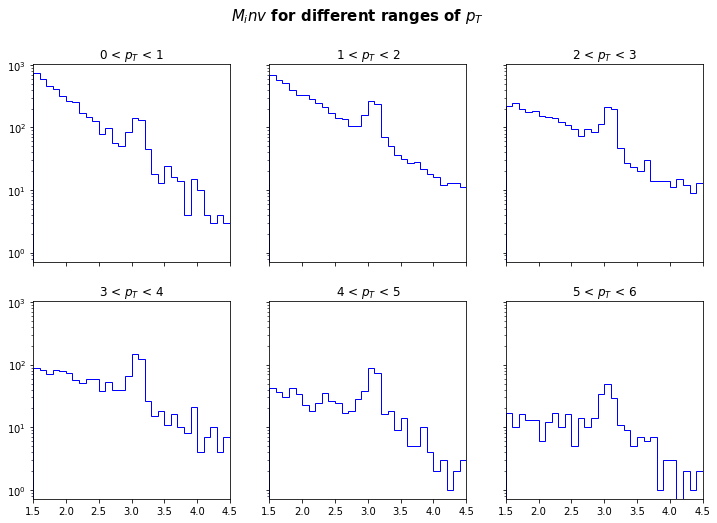

In [51]:
bins = np.linspace(1.5, 5, 36)
fig, axes = plt.subplots(2,3, figsize=(12,8), sharex=True, sharey=True)

p_T_bins = np.arange(0, 7)
axes[0, 0].set_xlim(1.5,4.5)
axes[0, 0].semilogy()


for id, ax  in enumerate(axes.flatten()) :
    p_min, p_max = p_T_bins[[id, id+1]]
    ax.set_title(f'{p_min} < $p_T$ < {p_max}')

    df_dm_selected = Filter.all_filters_di_muons(df_dm,  y_range=y_range, all_P_T=False, p_T_range=(p_min, p_max))
    df_dm_selected['M_inv'] = df_dm_selected.apply(lambda x: km.inv_mass(x['E1'], x['E2'], x['P1'], x['P2']), axis=1)
    ax.hist(df_dm_selected['M_inv'], bins=bins, range=[1.5,5], histtype='step', align='mid', color='b')

fig.suptitle('$M_{inv}$ for different ranges of $p_T$', fontweight='bold', fontsize=15)
plt.savefig('M_{inv} several P_t.pdf')

Not really relevant right now, useful for later maybe but i want to keep this code somewhere

In [67]:
from scipy.optimize import curve_fit
from itertools import pairwise

x_c = np.array([(x1 + x2) / 2 for x1, x2 in pairwise(h[1])])
m, y = np.array([(x1 + x2) / 2 for x1, x2 in pairwise(h[1])]), h[0]

m_min, m_max = 2.7, 3.3  # range of the mass excess

i_min = np.where(m > m_min)[0][0]
i_max = np.where(m < m_max)[0][-1]

x_JP, y_JP = m[i_min:i_max + 1], y[i_min:i_max + 1]
idx = [i for i in range(i_min)] + [i for i in range(i_max, len(m))]
x_without_JP = m[idx]
y_without_JP = y[idx]


In [68]:
def double_exp(z, A, k1, k2):
    return A * np.exp(-k1 * z) + np.exp(-k2 * z)


a, t1, t2 = curve_fit(double_exp, x_without_JP, y_without_JP, p0=(1000, 1,-1))[0]

Text(0.05, 0.5, 'Counts per 0.1 GeV')

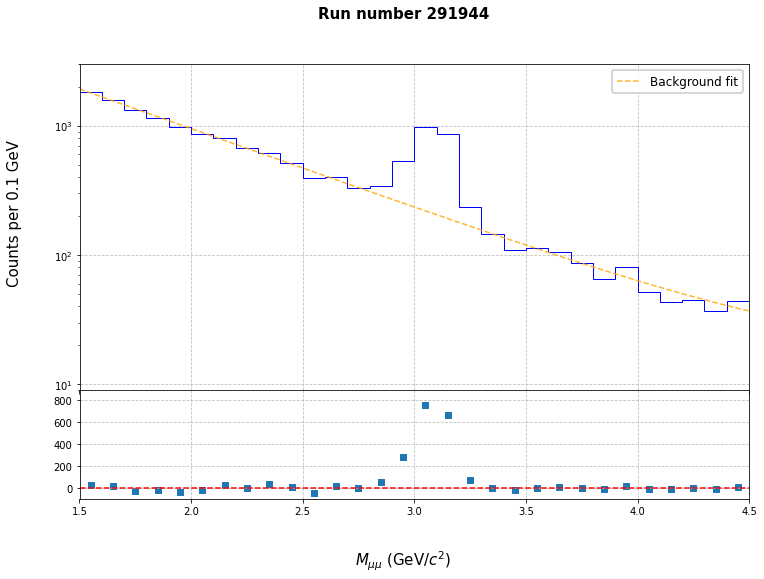

In [19]:
t = np.linspace(1.5, 5, 101)
bins = np.linspace(1.5, 5, 36)
fig, ax = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios': [3,1]}, figsize=(12,8))
fig.suptitle(f'Run number {run_number}', fontsize=15, fontweight='bold')

ax[0].set_xlim(1.5,4.5)
ax[0].semilogy()
ax[0].set_ylim(9,3e3)
ax[0].set_xlabel("$m_{\mu\mu}$ (GeV)", fontweight='bold', fontsize=12)

ax[0].hist(df_dm['M_inv'], bins=bins, range=[1.5,5], histtype='step', align='mid', color='b')
ax[0].plot(t, double_exp(t, a, t1, t2), c='orange', linestyle='dashed', alpha=0.8, label='Background fit')

leg = ax[0].legend(fontsize=12)
leg.get_frame().set_linewidth(2.0)
ax[0].grid(linestyle='dashed', alpha=0.8)

ax[1].scatter(x_c, h[0] - double_exp(x_c, a, t1, t2), marker='s')
ax[1].set_ylim(-100,890)
ax[1].axhline(0, c='r', linestyle='dashed')
ax[1].grid(linestyle='dashed', alpha=0.8)
plt.subplots_adjust(wspace=0, hspace=0)

fig.text(0.5, 0.01, '$M_{\mu\mu}$ (GeV/$c^2$)', ha='center', fontsize=15)
fig.text(0.05, 0.5, 'Counts per 0.1 GeV', ha='center', fontsize=15, rotation='vertical')

In [23]:
from scipy.stats import crystalball

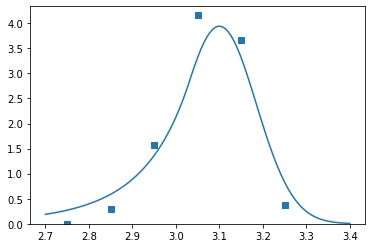

In [97]:
plt.scatter(x_JP, (y_JP - double_exp(x_JP, a, t1, t2)) / 182, marker='s')

x = np.linspace(2.7,3.4, 101)
#plt.xlim(2.8,3.4)

CB = crystalball.pdf(x, 0.8, 10, loc=3.1, scale=0.085)
plt.ylim(0,CB.max()*1.1 )
plt.plot(x, CB)

In [72]:
0.1 * (y_JP - double_exp(x_JP, a, t1, t2)).sum()

182.99938491831062